# Group 5 Hackathon

import necessary packages

In [597]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

## Data Cleaning

import the dataset

In [598]:
df = pd.read_csv(r"C:\Users\johns\OneDrive\Desktop\MBAN Semester 2\Predictive Analytics\Hackathon\Hackathon\data_set_hackathon.csv")

get an overview of the data

In [599]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [600]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


Check the amount of unique product codes

In [601]:
df['Product Code'].unique()

array(['L10705000', 'L10705100', 'L10705200', 'L10705300', 'L10705400',
       'L10705500', 'L10705600', 'L10705700', 'L10850600', 'L10850700',
       'L10850800', 'L10850900', 'L10852800', 'L10852900', 'L10853100',
       'L12134400', 'L12134500', 'L12134600', 'L12134700', 'L12135800',
       'L12135900', 'L12136000', 'L12136100', 'L12916800', 'L12916900',
       'L12917000', 'L12917100', 'L12917700', 'L12917800', 'L12917900',
       'L12918000', 'L12918400', 'L12918500', 'L12918600', 'L12918700',
       'L12918800', 'L12918900', 'L12919000', 'L12919100', 'L12919200'],
      dtype=object)

Set date values to datetime format

In [602]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

Sort the values by datetime

In [603]:
from datetime import date
df.sort_values(by='order_date', inplace=True)

In [604]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
25,2009-07-08,2010-01-28,RU,L10705100,Parka Outdoor Lifestyle STD,VO,3200435289,2650.50,RUB,6,RU0001
35,2009-07-08,2010-01-28,RU,L10705200,Parka Outdoor Lifestyle STD,VO,3200435289,2650.50,RUB,6,RU0001
136,2009-07-08,2010-01-28,RU,L10705700,Parka Outdoor Lifestyle STD,VO,3200435289,3092.25,RUB,7,RU0001
112,2009-07-08,2010-01-28,RU,L10705600,Parka Outdoor Lifestyle STD,VO,3200435289,2208.75,RUB,5,RU0001
67,2009-07-08,2010-01-28,RU,L10705400,Parka Outdoor Lifestyle STD,VO,3200435289,2208.75,RUB,5,RU0001


Check to see if there are any null values within the dataset

In [605]:
nan_values = df.isna().sum()
print("NaN values per column:")
print(nan_values)

NaN values per column:
order_date                 0
requested_delivery_date    0
Customer Country Code      0
Product Code               0
Description                0
order_type                 0
Customer Order Code        0
value                      0
Curr                       0
items                      0
Route                      0
dtype: int64


Check to see how many of the values within the items column are not numeric (/n)

In [606]:
# count the values in this dataframe where the items is not a number.
print(df[~df['items'].str.isnumeric()].count())

order_date                 346
requested_delivery_date    346
Customer Country Code      346
Product Code               346
Description                346
order_type                 346
Customer Order Code        346
value                      346
Curr                       346
items                      346
Route                      346
dtype: int64


Drop these values

In [607]:
# drop these  rows 
df = df[df['items'].str.isnumeric()]

In [608]:
df['items'] = df['items'].apply(pd.to_numeric)

In [609]:
df['items'].describe()

count    2074.000000
mean        8.288814
std        19.637378
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max       410.000000
Name: items, dtype: float64

67 is 3 standard deviations away from the mean.

For this reason we will remove these values

In [610]:
df = df[df['items'] < 67]

In [611]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2063 entries, 25 to 477
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2063 non-null   datetime64[ns]
 1   requested_delivery_date  2063 non-null   datetime64[ns]
 2   Customer Country Code    2063 non-null   object        
 3   Product Code             2063 non-null   object        
 4   Description              2063 non-null   object        
 5   order_type               2063 non-null   object        
 6   Customer Order Code      2063 non-null   int64         
 7   value                    2063 non-null   float64       
 8   Curr                     2063 non-null   object        
 9   items                    2063 non-null   int64         
 10  Route                    2063 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 193.4+ KB


Drop the duplicate values

In [612]:
df.drop_duplicates(inplace=True)

There were 2 exact values

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2061 entries, 25 to 477
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2061 non-null   datetime64[ns]
 1   requested_delivery_date  2061 non-null   datetime64[ns]
 2   Customer Country Code    2061 non-null   object        
 3   Product Code             2061 non-null   object        
 4   Description              2061 non-null   object        
 5   order_type               2061 non-null   object        
 6   Customer Order Code      2061 non-null   int64         
 7   value                    2061 non-null   float64       
 8   Curr                     2061 non-null   object        
 9   items                    2061 non-null   int64         
 10  Route                    2061 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 193.2+ KB


Check to see if requested delivery date is before the order date and remove those rows

In [614]:
# calculate the lead time by subtracting order_date from requested_delivery_date
df['Lead Time'] = df['requested_delivery_date'] - df['order_date']
# print check if any lead time is negative
print(df[df['Lead Time'] < timedelta(days=0)])
# delete the rows with negative lead time
df = df[df['Lead Time'] > timedelta(days=0)]
# check if any lead time is negative
print(df[df['Lead Time'] < timedelta(days=0)])

    order_date requested_delivery_date Customer Country Code Product Code  \
523 2012-11-19              2012-11-16                    FR    L12134500   
583 2012-11-19              2012-11-16                    FR    L12134600   
742 2012-11-19              2012-11-16                    FR    L12135800   
477 2012-11-19              2012-11-16                    FR    L12134400   

                     Description order_type  Customer Order Code  value Curr  \
523  Parka Outdoor Lifestyle STD         VO           3201061588  525.0  EUR   
583  Parka Outdoor Lifestyle STD         VO           3201061588   15.0  EUR   
742  Parka Outdoor Lifestyle STD         VO           3201061588  495.0  EUR   
477  Parka Outdoor Lifestyle STD         VO           3201061588  120.0  EUR   

     items   Route Lead Time  
523     35  FR0001   -3 days  
583      1  FR0001   -3 days  
742     33  FR0001   -3 days  
477      8  FR0001   -3 days  
Empty DataFrame
Columns: [order_date, requested_delivery_d

4 rows were removed

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2057 entries, 25 to 841
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   order_date               2057 non-null   datetime64[ns] 
 1   requested_delivery_date  2057 non-null   datetime64[ns] 
 2   Customer Country Code    2057 non-null   object         
 3   Product Code             2057 non-null   object         
 4   Description              2057 non-null   object         
 5   order_type               2057 non-null   object         
 6   Customer Order Code      2057 non-null   int64          
 7   value                    2057 non-null   float64        
 8   Curr                     2057 non-null   object         
 9   items                    2057 non-null   int64          
 10  Route                    2057 non-null   object         
 11  Lead Time                2057 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), flo

Creates buckets for seasons and assign each a number

Create a variable for delivery month, lead time, advanced order, and value per item

In [616]:
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'

df['Delivery Month'] = df['requested_delivery_date'].dt.month
df['Season'] = df['Delivery Month'].apply(month_to_season)

df['Lead Time'] = (df['requested_delivery_date'] - df['order_date']).dt.days

df['advanced_order'] = (df['Lead Time'] >= 30).astype(int)

# Ensure 'value' and 'items' columns contain numerical values
df['Value/Item'] = pd.to_numeric(df['value'], errors='coerce') / pd.to_numeric(df['items'], errors='coerce')

df['Season_Num'] = df['Season'].map({'Winter': 1, 'Spring': 2, 'Summer': 3, 'Fall': 4})

In [617]:
df['Previous Month'] = df['order_date'].dt.to_period('M') - 1

# Initialize the 'Estimated Price' column with zeros
df['Estimated Price'] = 0.0

# Iterate through each row to calculate the estimated price
for index, row in df.iterrows():
    previous_month_price = df.loc[
        (df['Product Code'] == row['Product Code']) & (df['Previous Month'] == row['order_date'].to_period('M')),
        'Value/Item'
    ].mean()

    # Update 'Estimated Price' with the calculated value
    df.at[index, 'Estimated Price'] = previous_month_price if not pd.isnull(previous_month_price) else 0.0

# Drop the 'Previous Month' column if no longer needed
df = df.drop(columns=['Previous Month'])

In [618]:
df['Order Month'] = df['order_date'].dt.to_period('M')
df['Estimated price next month'] = df.groupby(['Product Code', 'Order Month'])['value'].transform('mean')
df['Estimated price next month'] = df.groupby(['Product Code'])['Estimated price next month'].shift(1)
df.loc[df['Order Month'] == '2009-01-01', 'Estimated price next month'] = 0.0

In [619]:
df[['Estimated price next month', 'order_date', 'Product Code', 'Value/Item']].head()

,Estimated price next month,order_date,Product Code,Value/Item
25,NaN,2009-07-08,L10705100,441.75
35,NaN,2009-07-08,L10705200,441.75
136,NaN,2009-07-08,L10705700,441.75
112,NaN,2009-07-08,L10705600,441.75
67,NaN,2009-07-08,L10705400,441.75


In [620]:
df['Order Year'] = df['order_date'].dt.to_period('Y')

In [621]:
df['Year-Season'] = df['Order Year'].astype(str) + '-' + df['Season']

year_season_orders = df.groupby('Year-Season').agg({'value': 'sum'}).reset_index()

year_season_orders['Year-Season'] = pd.Categorical(year_season_orders['Year-Season'], categories=sorted(df['Year-Season'].unique()), ordered=True)
year_season_orders = year_season_orders.sort_values('Year-Season')

## EDA

Group the data by country code and season in order to find in which seasons certain countries have the highest and lowest ordered items

In [622]:
grouped_data = df.groupby(['Customer Country Code', 'Season'])['items'].sum().reset_index()

In [623]:
# Find the country with the highest number of items in each season
max_items = grouped_data.loc[grouped_data.groupby('Season')['items'].idxmax()]

# Find the country with the lowest number of items in each season
min_items = grouped_data.loc[grouped_data.groupby('Season')['items'].idxmin()]

# Display the results
print("Countries with the highest number of items in each season:")
print(max_items)

print("\nCountries with the lowest number of items in each season:")
print(min_items)

Countries with the highest number of items in each season:
   Customer Country Code  Season  items
62                    RU    Fall   1327
63                    RU  Spring   2847
4                     AT  Summer    884
65                    RU  Winter   1154

Countries with the lowest number of items in each season:
   Customer Country Code  Season  items
34                    FI    Fall      9
6                     BE  Spring      2
20                    CZ  Summer      1
55                    NO  Winter      2


In Fall, Russia has the highest number of orders and Finland has the lowest

In Spring, Russia has the highest number of orders and Belgium has the lowest

In Summer, Austria has the highest number of orders and the Czech Republic has the lowest

In Winter, Switzerland has the highest number of orders and Norway has the lowest

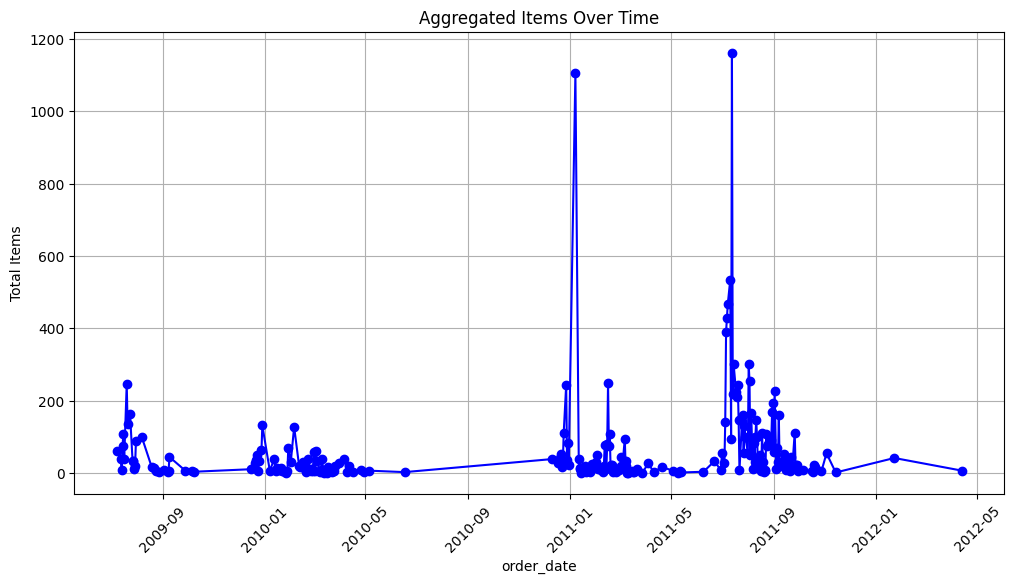

In [624]:
agg_df = df.groupby('order_date')['items'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(agg_df['order_date'], agg_df['items'], marker='o', linestyle='-', color='b')
plt.title('Aggregated Items Over Time')
plt.xlabel('order_date')
plt.ylabel('Total Items')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

There are 3 peaks of order. These come in Fall of 2009, Winter of 2011, and Summer of 2011

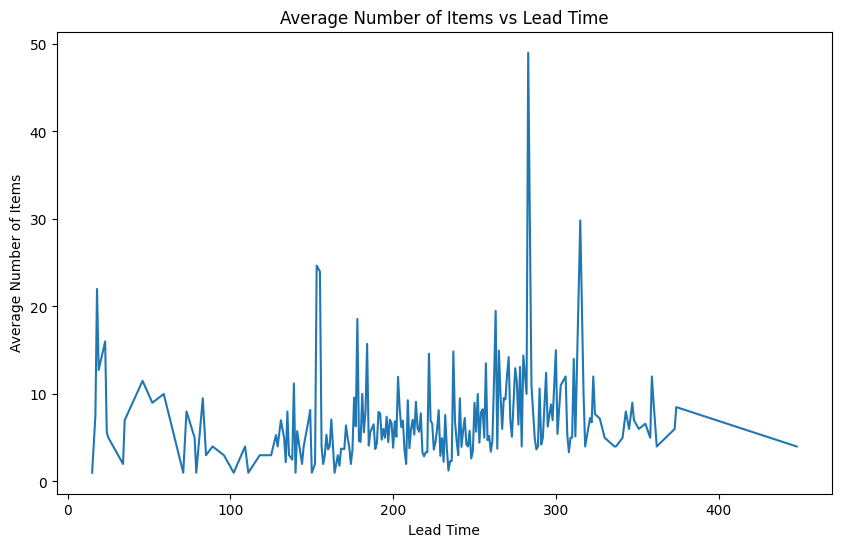

In [625]:
average_items_by_lead_time = df.groupby('Lead Time')['items'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Lead Time', y='items', data=average_items_by_lead_time)

# Set plot title and labels
plt.title('Average Number of Items vs Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Average Number of Items')

# Show the plot
plt.show()

As the number of orders goes up, this seems to not have an effect on the lead time of the order

The higest peak of an average number of items in an order reaches 100, this does not affect the lead time as it stays in the middle around 220

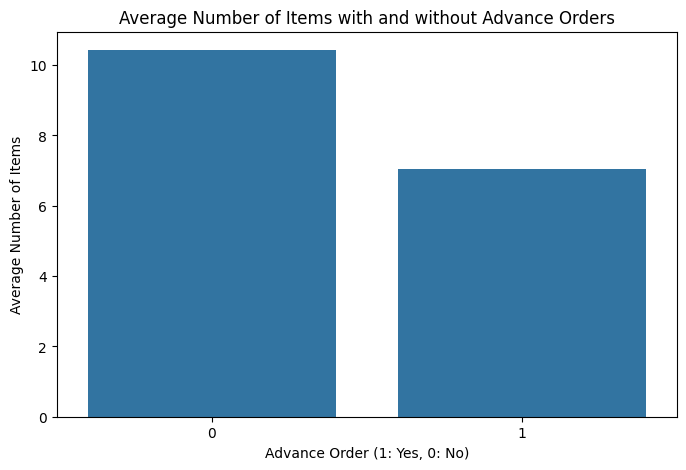

In [626]:
avg_items_by_advance_order = df.groupby('advanced_order')['items'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='advanced_order', y='items', data=avg_items_by_advance_order)

# Set plot title and labels
plt.title('Average Number of Items with and without Advance Orders')
plt.xlabel('Advance Order (1: Yes, 0: No)')
plt.ylabel('Average Number of Items')

# Show the plot
plt.show()

More items are ordered not in advance

Not in advance means the order is placed within the month of the requested delivery date

## Choice Probability Model

Setting the required features for the model and splitting them into X and y

These are then fed through a label encoder

Then the categorical feastures are put through one hot encoding and the numerical features are scaled

In [627]:
features = ['order_date', 'requested_delivery_date', 'Customer Country Code', 'Description', 'order_type', 'Customer Order Code', 
            'value', 'Curr', 'items', 'Route', 'Lead Time', 'Delivery Month', 'Season', 'advanced_order', 'Value/Item', 'Order Month', 
            'Estimated Price', 'Year-Season']

X = df[features]
y = df['Product Code']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

categorical_features = ['Season', 'Customer Country Code', 'Route', 'advanced_order']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['Lead Time', 'items', 'value', 'Value/Item', 'Estimated Price']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


Setting up the preprocessor and the pipeline

The class is set to multinomial

In [628]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, multi_class='multinomial'))
])

Find the log loss which is used to evaluate a binary classification model

In [629]:
from sklearn.metrics import log_loss

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded)
model.fit(X_train, y_train)

y_pred_probs = model.predict_proba(X_test)

logloss = log_loss(y_test, y_pred_probs)
print(f'Log Loss: {logloss:.4f}')

Log Loss: 2.2877


The high log loss shows there is a lot of uncertainty within the model

However a higher log loss is more accetable when dealing with a multi class problem in contrast to a binary classification problem where a log loss close to zero is preferred 

Below produces the choice probabilities of the specific products across the different seasons

In [630]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

probabilities = model.predict_proba(X)

prob_cols = [f'prob_{code}' for code in le.classes_]
df_probs = pd.DataFrame(probabilities, columns=prob_cols, index=X.index)

df_with_probs = df.join(df_probs)

seasonal_choice_probabilities = df_with_probs.groupby('Season')[prob_cols].mean()

print('')
print(seasonal_choice_probabilities)

Accuracy: 0.2646

        prob_L10705000  prob_L10705100  prob_L10705200  prob_L10705300  \
Season                                                                   
Fall          0.002646        0.001909        0.001760        0.003027   
Spring        0.006032        0.002149        0.002894        0.003746   
Summer        0.004735        0.003282        0.001906        0.005414   
Winter        0.041193        0.017857        0.028099        0.032408   

        prob_L10705400  prob_L10705500  prob_L10705600  prob_L10705700  \
Season                                                                   
Fall          0.002481        0.002106        0.003379        0.001894   
Spring        0.003052        0.001254        0.004690        0.001773   
Summer        0.001581        0.002781        0.010264        0.001261   
Winter        0.053224        0.031676        0.043597        0.021038   

        prob_L10850600  prob_L10850700  ...  prob_L12918000  prob_L12918400  \
Season       

In [631]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 [1 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 2]
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00         2
           2       0.50      0.67      0.57         3
           3       1.00      0.67      0.80         3
           4       0.30      0.60      0.40         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           8       0.19      0.38      0.26        13
           9       0.00      0.00      0.00         3
          10       0.33      0.33      0.33         9
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         9
          13       0.33      0.17      0.22         6
          14       0.00   

In [632]:
# create a code for coerelation matrix
corr = df.corr()
# plot the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

ValueError: could not convert string to float: 'RU'

TSA

Check for Stationarity

In [ ]:
# Mention the null and alternate hyoo

In [ ]:
items_column = "Items"

def adfuller_test(Items):
    df.sort_values(by='Order Date', inplace=True)
    result=adfuller(Items)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
df_ts = df[['Requested Delivery Date','Items']]

KeyError: "None of [Index(['Requested Delivery Date', 'Items'], dtype='object')] are in the [columns]"

In [ ]:
df_ts.head()

,Requested Delivery Date,Items
0,2009-02-18,8
1,2009-02-10,2
2,2009-01-17,7
3,2009-01-28,6
4,2009-01-18,5


In [ ]:
df_ts.set_index('Requested Delivery Date', inplace = True)

<Axes: xlabel='Requested Delivery Date'>

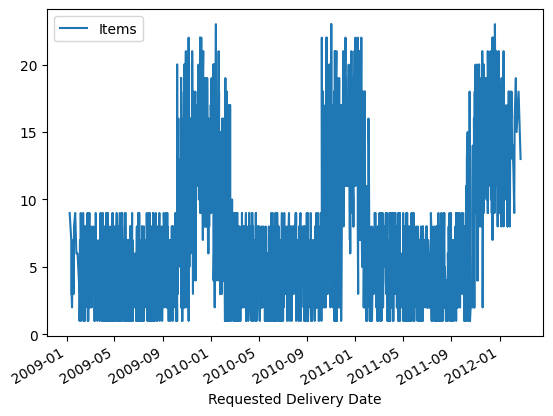

In [ ]:
df_ts.plot()  # To observe the trend in the data


In [ ]:
adfuller_test(df_ts['Items'])

ADF Test Statistic : -2.847368712369648
p-value : 0.05181955502912273
#Lags Used : 14
Number of Observations Used : 2406
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#Differencing

In [ ]:
df_ts['Seasonal Difference Items']=df_ts['Items']-df_ts['Items'].shift(12)

In [ ]:
## Again test dickey fuller test
adfuller_test(df_ts['Seasonal Difference Items'].dropna())

ADF Test Statistic : -10.22609188531582
p-value : 5.172401135773686e-18
#Lags Used : 26
Number of Observations Used : 2382
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
df_ts.dropna(inplace=True)

<Axes: xlabel='Requested Delivery Date'>

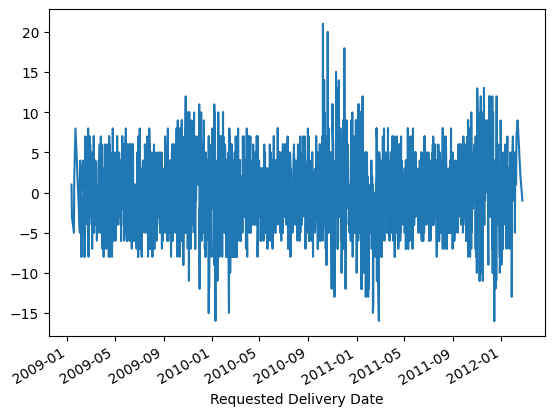

In [ ]:
df_ts['Seasonal Difference Items'].plot()

Autocorrelation Model
Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor. Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model. p,d,q p AR model lags d differencing q MA lags

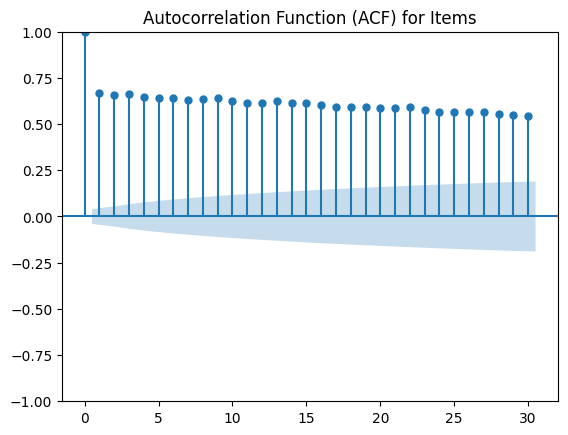

In [ ]:
plot_acf(df_ts[items_column], lags=30)  # You can adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF) for {}'.format(items_column))
plt.show()



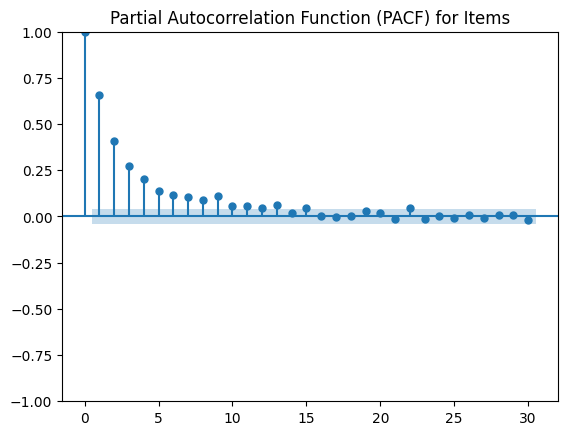

In [ ]:
plot_pacf(df[items_column], lags=30)
plt.title('Partial Autocorrelation Function (PACF) for {}'.format(items_column))
plt.show()

In [ ]:
df_ts.head()

,Items,Seasonal Difference Items
Requested Delivery Date,,
2009-01-18,3,-5.0
2009-03-02,7,5.0
2009-02-06,7,0.0
2009-02-04,7,1.0
2009-02-22,2,-3.0


In [ ]:
df_ts.tail()

,Items,Seasonal Difference Items
Requested Delivery Date,,
2012-01-30,16,7.0
2012-01-19,11,-1.0
2012-01-10,16,1.0
2012-02-04,14,5.0
2012-02-04,13,-5.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Items'], order=(1, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Items   No. Observations:                 2421
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6171.499
Date:                Mon, 11 Dec 2023   AIC                          12348.997
Time:                        12:51:06   BIC                          12366.372
Sample:                             0   HQIC                         12355.315
                               - 2421                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0117      0.021     -0.573      0.567      -0.052       0.028
ma.L1         -0.8624      0.009    -91.661      0.000      -0.881      -0.844
sigma2         9.6019      0.275     34.936      0.0

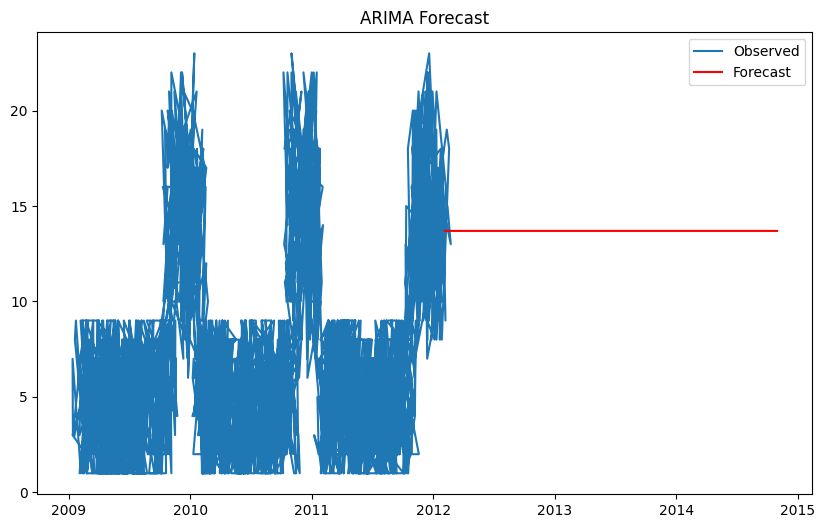

In [ ]:
forecast_steps = 1000  # You can adjust the number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_ts.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')
forecast_values = forecast.predicted_mean

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_ts['Items'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Items'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results_sarima=model.fit()
results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Items   No. Observations:                 2421
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -6174.022
Date:                            Mon, 11 Dec 2023   AIC                          12358.044
Time:                                    12:51:17   BIC                          12386.977
Sample:                                         0   HQIC                         12368.568
                                           - 2421                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0135      0.021     -0.652      0.514      -0.054       0.027
ma.L1         -0.8608      0.010    -89.773      0.000      -0.880      -0.842
ar.S.L12      -0.0066      0.019     -0.345      0.730      -0.044       0.031
ma.S.L12      -0.9867      0.006   -169.279      0.000      -0.998      -0.975
sigma2         9.6908      0.279     34.695      0.000       9.143      10.238
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.05
Prob(Q):                              1.00   Prob(JB):                         0.13
Heteroskedasticity (H):               1.03   Skew:                             0.07
Prob(H) (two-sided):                  0.67   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

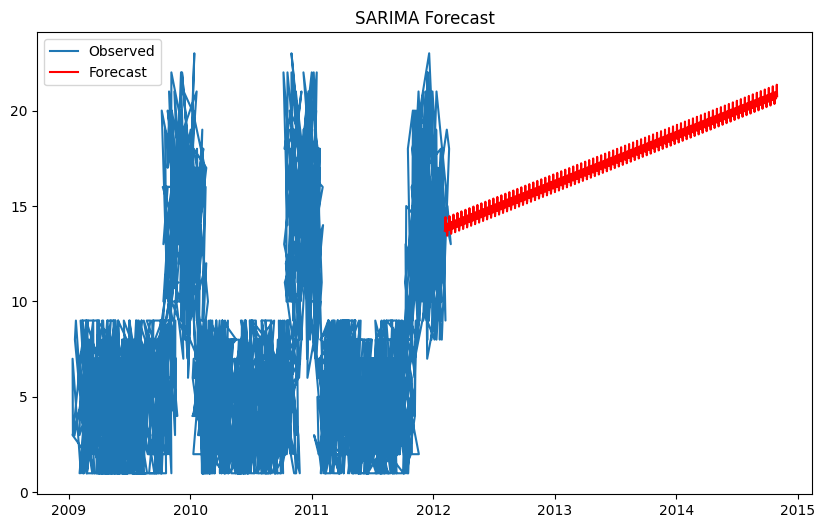

In [ ]:
forecast_steps = 1000
forecast = results_sarima.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(df_ts.index[-1] + pd.DateOffset(1), periods=forecast_steps, freq='D')
forecast_values = forecast.predicted_mean

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(df_ts['Items'], label='Observed')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime, timedelta
import pandas as pd

# Function to predict future values for a particular season and year
def predict_future_values_seasonal(model, start_season, start_year, forecast_periods):
    # Convert the season to a month (e.g., start of the season)
    start_month = (start_season - 1) * 3 + 1

    # Create a datetime object for the specified start month and year
    start_date = datetime(start_year, start_month, 1)

    # Make forecasts
    forecast = model.get_forecast(steps=forecast_periods)

    # Extract forecasted values and confidence intervals
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Create a date index for the forecasted values with quarterly start frequency
    forecast_index = pd.date_range(start=start_date, periods=forecast_periods, freq='QS')

    # Combine forecast values and confidence intervals into a DataFrame
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values.values,
        'Lower CI': forecast_conf_int.iloc[:, 0].values,
        'Upper CI': forecast_conf_int.iloc[:, 1].values
    }, index=forecast_index)

    return forecast_df

test_year = 2012

forecast_periods = 1  # Assuming quarterly forecasts, adjust as needed

# Call the function to get the forecast for the specified season and year
forecast_summer = predict_future_values_seasonal(results_sarima,3 , test_year, forecast_periods)
forecast_spring = predict_future_values_seasonal(results_sarima,2 , test_year, forecast_periods)
forecast_fall = predict_future_values_seasonal(results_sarima, 4, test_year, forecast_periods)
forecast_winter = predict_future_values_seasonal(results_sarima,1 , test_year, forecast_periods)

print("Summer")
print("----------------------------")
print(forecast_summer)

print("\nSpring")
print("----------------------------")
print(forecast_spring)

print("\nFall")
print("----------------------------")
print(forecast_fall)

print("\nWinter")
print("----------------------------")
print(forecast_winter)

Summer
----------------------------
             Forecast  Lower CI   Upper CI
2012-07-01  13.702884   7.60112  19.804648

Spring
----------------------------
             Forecast  Lower CI   Upper CI
2012-04-01  13.702884   7.60112  19.804648

Fall
----------------------------
             Forecast  Lower CI   Upper CI
2012-10-01  13.702884   7.60112  19.804648

Winter
----------------------------
             Forecast  Lower CI   Upper CI
2012-01-01  13.702884   7.60112  19.804648


In [ ]:
probability_df = pd.DataFrame({
    'prob_PK001': [0.233593, 0.279271, 0.228768, 0.268303],
    'prob_PK002': [0.276646, 0.242298, 0.262794, 0.221521],
    'prob_PK003': [0.241138, 0.235507, 0.228882, 0.271709],
    'prob_PK004': [0.248623, 0.242924, 0.279557, 0.238468]
}, index=['Fall', 'Spring', 'Summer', 'Winter'])